In [ ]:
# ============================================================
# ANÁLISIS DE CORRELACIÓN - Home Credit Default Risk
# ============================================================
# Este notebook realiza un análisis exhaustivo de correlación
# para entender las relaciones entre variables y su impacto
# en el riesgo de incumplimiento crediticio (TARGET)
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

# Configuración de visualización
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
sns.set_palette("husl")

import warnings
warnings.filterwarnings('ignore')

# Crear directorio para guardar resultados
OUTPUT_DIR = "../../data/corr"
os.makedirs(OUTPUT_DIR, exist_ok=True)
print(f"📁 Directorio de salida: {OUTPUT_DIR}")


In [16]:
# ============================================================
# PASO 1: CARGA Y EXPLORACIÓN INICIAL DE DATOS
# ============================================================

df = pd.read_csv("../../data/processed/variables.csv")

print("="*60)
print("INFORMACIÓN GENERAL DEL DATASET")
print("="*60)
print(f"Número de registros: {df.shape[0]:,}")
print(f"Número de variables: {df.shape[1]}")
print(f"\nColumnas disponibles:")
print(df.columns.tolist())
print(f"\nTipos de datos:")
print(df.dtypes.value_counts())

INFORMACIÓN GENERAL DEL DATASET
Número de registros: 307,511
Número de variables: 41

Columnas disponibles:
['SK_ID_CURR', 'TARGET', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'EDAD_ANOS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'SCORE_PROMEDIO', 'CREDIT_INCOME_RATIO', 'NAME_FAMILY_STATUS', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'CODE_GENDER', 'NAME_EDUCATION_TYPE', 'INGRESO_PER_CAPITA', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NUM_ACTIVOS', 'TOTAL_CONSULTAS_BURO', 'TOTAL_CREDITO_DISPONIBLE', 'TOTAL_CREDITO_OTORGADO', 'TOTAL_DEUDA_ACTUAL', 'MAX_DIAS_MORA', 'CANTIDAD_CREDITOS_BURO', 'CREDITOS_ACTIVOS', 'CREDITOS_CERRADOS', 'TIENE_IMPAGOS', 'ES_PRIMER_CREDITO', 'MESES_CON_MORA', 'PCT_MESES_MORA', 'CREDITOS_CON_IMPAGO', 'NUM_PRESTAMOS_PREVIOS', 'TASA_INTERES_PROMEDIO', 'PLAZO_PROMEDIO', 'MONTO_PROMEDIO_PREVIO', 'TOTAL_CREDITO_HISTORICO', 'RATIO_PAGO_CUOTA', 'RATIO_PAGO_MINIMO_TC']

Tipos de datos:
float64    30
int64       6
object      5
Name: count, dtype: int64


In [17]:
# ============================================================
# PASO 2: SELECCIÓN DE VARIABLES NUMÉRICAS
# ============================================================
# Para el análisis de correlación, nos enfocamos en variables numéricas
# Excluimos el ID ya que no tiene valor predictivo

# Identificar columnas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Excluir SK_ID_CURR (identificador)
if 'SK_ID_CURR' in numeric_cols:
    numeric_cols.remove('SK_ID_CURR')

print("="*60)
print("VARIABLES NUMÉRICAS PARA ANÁLISIS DE CORRELACIÓN")
print("="*60)
print(f"Total de variables numéricas: {len(numeric_cols)}")
print(f"\nVariables incluidas:")
for i, col in enumerate(numeric_cols, 1):
    print(f"  {i:2d}. {col}")

# Crear dataframe con solo variables numéricas
df_numeric = df[numeric_cols].copy()


VARIABLES NUMÉRICAS PARA ANÁLISIS DE CORRELACIÓN
Total de variables numéricas: 35

Variables incluidas:
   1. TARGET
   2. AMT_CREDIT
   3. AMT_ANNUITY
   4. AMT_INCOME_TOTAL
   5. DAYS_BIRTH
   6. EDAD_ANOS
   7. EXT_SOURCE_1
   8. EXT_SOURCE_2
   9. EXT_SOURCE_3
  10. SCORE_PROMEDIO
  11. CREDIT_INCOME_RATIO
  12. CNT_CHILDREN
  13. CNT_FAM_MEMBERS
  14. INGRESO_PER_CAPITA
  15. NUM_ACTIVOS
  16. TOTAL_CONSULTAS_BURO
  17. TOTAL_CREDITO_DISPONIBLE
  18. TOTAL_CREDITO_OTORGADO
  19. TOTAL_DEUDA_ACTUAL
  20. MAX_DIAS_MORA
  21. CANTIDAD_CREDITOS_BURO
  22. CREDITOS_ACTIVOS
  23. CREDITOS_CERRADOS
  24. TIENE_IMPAGOS
  25. ES_PRIMER_CREDITO
  26. MESES_CON_MORA
  27. PCT_MESES_MORA
  28. CREDITOS_CON_IMPAGO
  29. NUM_PRESTAMOS_PREVIOS
  30. TASA_INTERES_PROMEDIO
  31. PLAZO_PROMEDIO
  32. MONTO_PROMEDIO_PREVIO
  33. TOTAL_CREDITO_HISTORICO
  34. RATIO_PAGO_CUOTA
  35. RATIO_PAGO_MINIMO_TC


In [18]:
# ============================================================
# PASO 3: ESTADÍSTICAS DESCRIPTIVAS
# ============================================================
# Antes de calcular correlaciones, revisemos las estadísticas básicas

print("="*60)
print("ESTADÍSTICAS DESCRIPTIVAS DE VARIABLES NUMÉRICAS")
print("="*60)

# Mostrar estadísticas descriptivas
desc_stats = df_numeric.describe().T
desc_stats['missing'] = df_numeric.isnull().sum()
desc_stats['missing_%'] = (df_numeric.isnull().sum() / len(df_numeric) * 100).round(2)

print(desc_stats[['count', 'mean', 'std', 'min', '50%', 'max', 'missing', 'missing_%']])


ESTADÍSTICAS DESCRIPTIVAS DE VARIABLES NUMÉRICAS
                             count          mean           std           min  \
TARGET                    307511.0  8.072882e-02  2.724186e-01  0.000000e+00   
AMT_CREDIT                307511.0  5.990260e+05  4.024908e+05  4.500000e+04   
AMT_ANNUITY               307499.0  2.710857e+04  1.449374e+04  1.615500e+03   
AMT_INCOME_TOTAL          307511.0  1.687979e+05  2.371231e+05  2.565000e+04   
DAYS_BIRTH                307511.0 -1.603700e+04  4.363989e+03 -2.522900e+04   
EDAD_ANOS                 307511.0  4.390690e+01  1.194795e+01  2.050376e+01   
EXT_SOURCE_1              134133.0  5.021298e-01  2.110622e-01  1.456813e-02   
EXT_SOURCE_2              306851.0  5.143927e-01  1.910602e-01  8.173617e-08   
EXT_SOURCE_3              246546.0  5.108529e-01  1.948444e-01  5.272652e-04   
SCORE_PROMEDIO            307339.0  5.092512e-01  1.498020e-01  5.939651e-06   
CREDIT_INCOME_RATIO       307511.0  3.957570e+00  2.689728e+00  4.80761

MATRIZ DE CORRELACIÓN DE PEARSON
Dimensiones de la matriz: (35, 35)


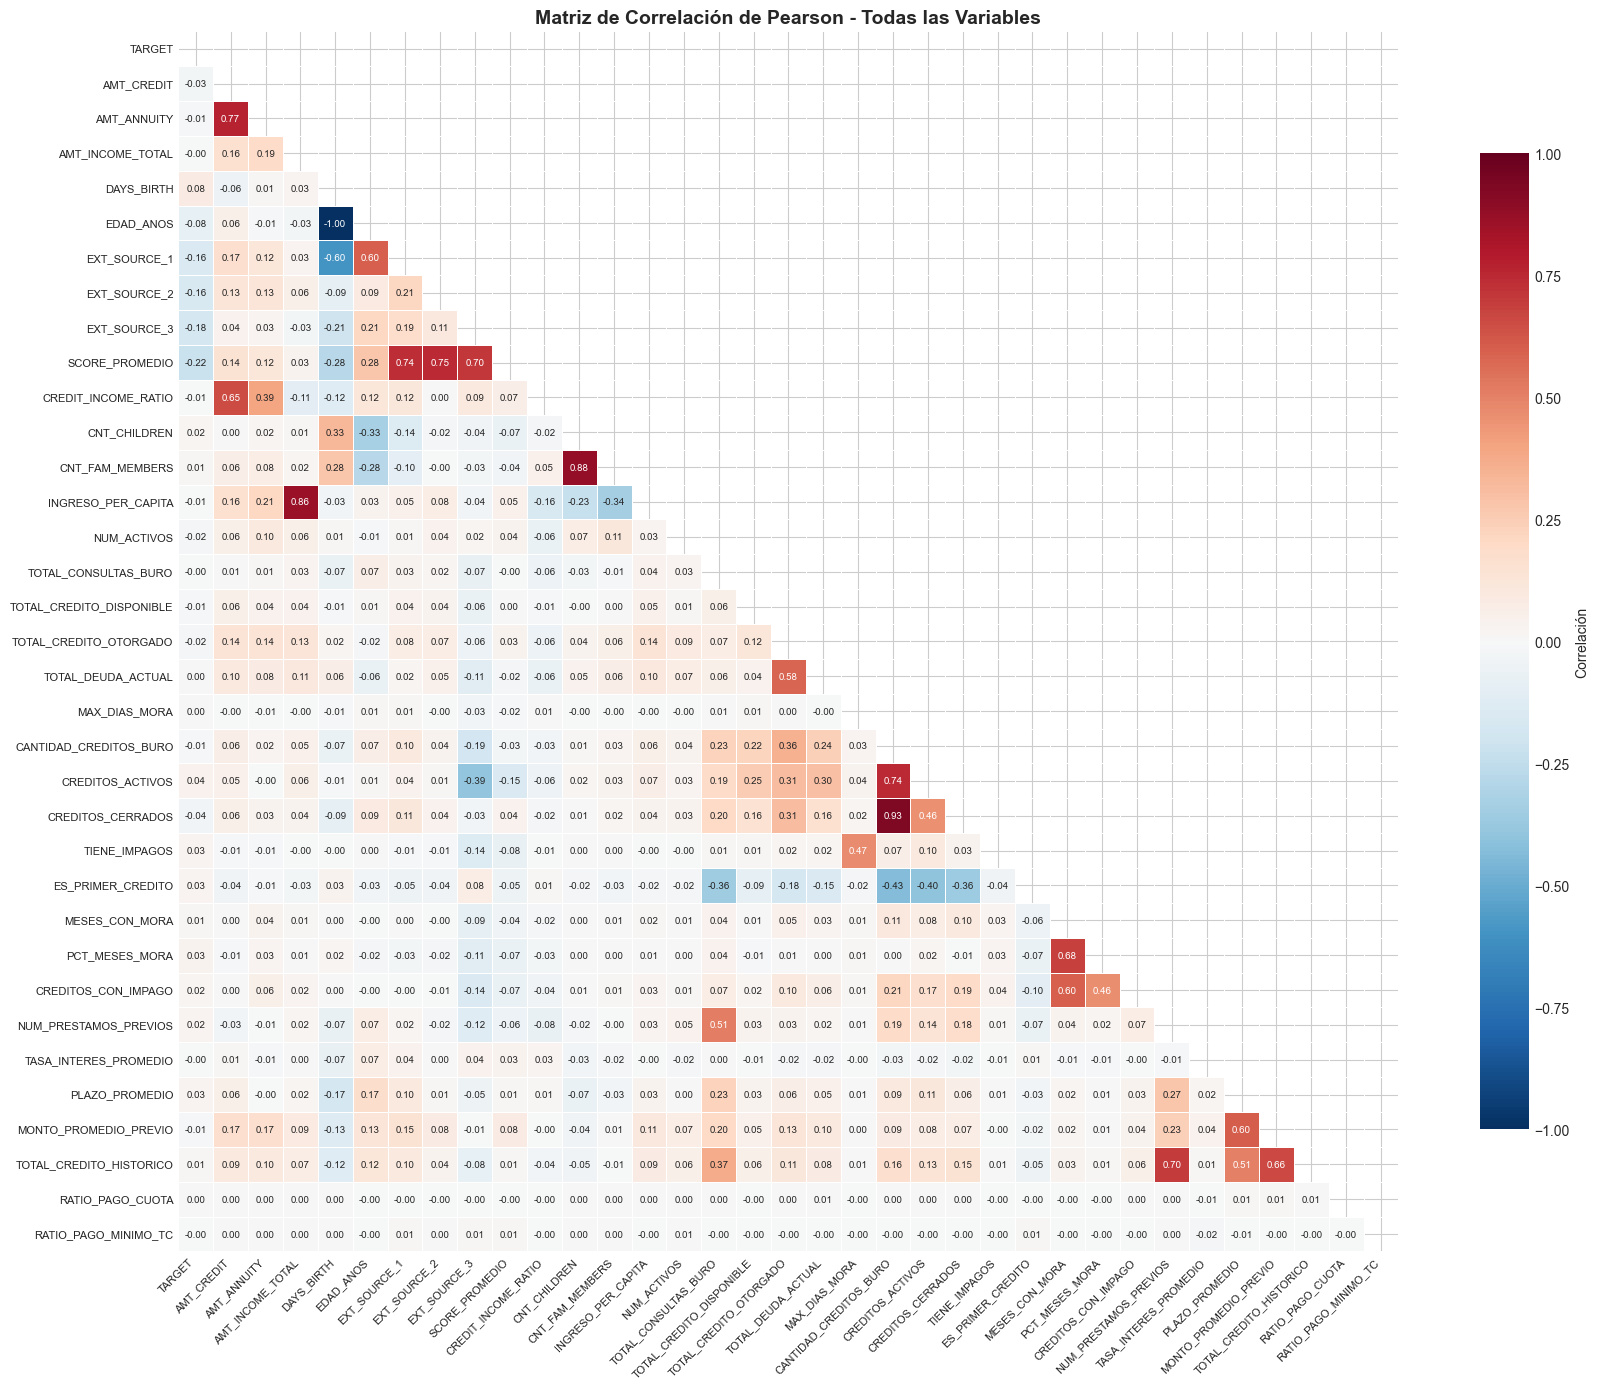

In [ ]:
# ============================================================
# PASO 4: MATRIZ DE CORRELACIÓN DE PEARSON
# ============================================================
# La correlación de Pearson mide la relación lineal entre variables
# Valores: -1 (correlación negativa perfecta) a +1 (correlación positiva perfecta)

# Calcular matriz de correlación
correlation_matrix = df_numeric.corr(method='pearson')

print("="*60)
print("MATRIZ DE CORRELACIÓN DE PEARSON")
print("="*60)
print(f"Dimensiones de la matriz: {correlation_matrix.shape}")

# Visualización del heatmap completo
plt.figure(figsize=(18, 14))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Máscara triangular superior

heatmap = sns.heatmap(
    correlation_matrix,
    mask=mask,
    annot=True,
    fmt='.2f',
    cmap='RdBu_r',
    center=0,
    vmin=-1,
    vmax=1,
    square=True,
    linewidths=0.5,
    cbar_kws={'shrink': 0.8, 'label': 'Correlación'},
    annot_kws={'size': 7}
)

plt.title('Matriz de Correlación de Pearson - Todas las Variables', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/correlation_matrix_full.png', dpi=150, bbox_inches='tight')
plt.show()


CORRELACIÓN DE VARIABLES CON TARGET (Incumplimiento)

Ordenado por valor absoluto de correlación:

SCORE_PROMEDIO                     : -0.2221 (↓ Negativa, Moderada)
EXT_SOURCE_3                       : -0.1789 (↓ Negativa, Moderada)
EXT_SOURCE_2                       : -0.1605 (↓ Negativa, Moderada)
EXT_SOURCE_1                       : -0.1553 (↓ Negativa, Moderada)
EDAD_ANOS                          : -0.0782 (↓ Negativa, Débil)
DAYS_BIRTH                         : +0.0782 (↑ Positiva, Débil)
CREDITOS_ACTIVOS                   : +0.0436 (↑ Positiva, Débil)
CREDITOS_CERRADOS                  : -0.0372 (↓ Negativa, Débil)
PCT_MESES_MORA                     : +0.0317 (↑ Positiva, Débil)
ES_PRIMER_CREDITO                  : +0.0308 (↑ Positiva, Débil)
AMT_CREDIT                         : -0.0304 (↓ Negativa, Débil)
TIENE_IMPAGOS                      : +0.0304 (↑ Positiva, Débil)
PLAZO_PROMEDIO                     : +0.0277 (↑ Positiva, Débil)
NUM_PRESTAMOS_PREVIOS              : +0.0235

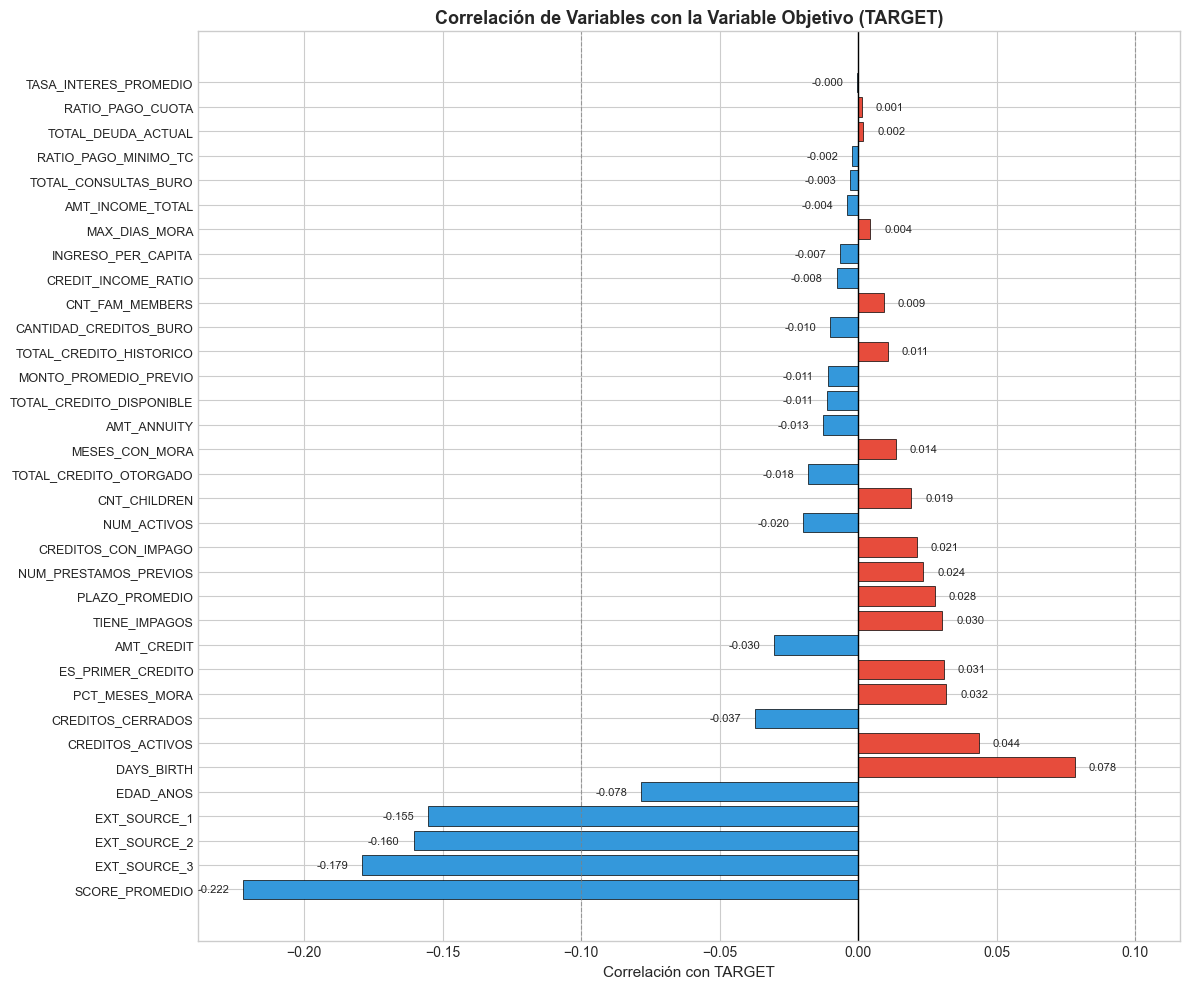

In [ ]:
# ============================================================
# PASO 5: CORRELACIÓN CON LA VARIABLE OBJETIVO (TARGET)
# ============================================================
# Analizamos qué variables tienen mayor correlación con el incumplimiento

if 'TARGET' in df_numeric.columns:
    # Correlaciones con TARGET
    target_corr = correlation_matrix['TARGET'].drop('TARGET').sort_values(key=abs, ascending=False)
    
    print("="*60)
    print("CORRELACIÓN DE VARIABLES CON TARGET (Incumplimiento)")
    print("="*60)
    print("\nOrdenado por valor absoluto de correlación:\n")
    
    for var, corr in target_corr.items():
        direction = "↑ Positiva" if corr > 0 else "↓ Negativa"
        strength = "Fuerte" if abs(corr) > 0.3 else "Moderada" if abs(corr) > 0.1 else "Débil"
        print(f"{var:35s}: {corr:+.4f} ({direction}, {strength})")
    
    # Visualización de barras
    plt.figure(figsize=(12, 10))
    colors = ['#e74c3c' if x > 0 else '#3498db' for x in target_corr.values]
    
    bars = plt.barh(range(len(target_corr)), target_corr.values, color=colors, edgecolor='black', linewidth=0.5)
    plt.yticks(range(len(target_corr)), target_corr.index, fontsize=9)
    plt.xlabel('Correlación con TARGET', fontsize=11)
    plt.title('Correlación de Variables con la Variable Objetivo (TARGET)', fontsize=13, fontweight='bold')
    plt.axvline(x=0, color='black', linewidth=1)
    plt.axvline(x=0.1, color='gray', linestyle='--', linewidth=0.8, alpha=0.7)
    plt.axvline(x=-0.1, color='gray', linestyle='--', linewidth=0.8, alpha=0.7)
    
    # Añadir valores en las barras
    for i, (bar, val) in enumerate(zip(bars, target_corr.values)):
        plt.text(val + 0.005 if val > 0 else val - 0.005, i, f'{val:.3f}', 
                 va='center', ha='left' if val > 0 else 'right', fontsize=8)
    
    plt.tight_layout()
    plt.savefig(f'{OUTPUT_DIR}/correlation_with_target.png', dpi=150, bbox_inches='tight')
    plt.show()
else:
    print("La variable TARGET no está presente en el dataset")


In [21]:
# ============================================================
# PASO 6: IDENTIFICACIÓN DE MULTICOLINEALIDAD
# ============================================================
# La multicolinealidad ocurre cuando variables predictoras están altamente correlacionadas
# Esto puede afectar la interpretabilidad de modelos como la regresión logística

# Definir umbral de alta correlación
threshold = 0.7

# Encontrar pares de variables altamente correlacionadas
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append({
                'Variable_1': correlation_matrix.columns[i],
                'Variable_2': correlation_matrix.columns[j],
                'Correlación': correlation_matrix.iloc[i, j]
            })

print("="*60)
print(f"PARES DE VARIABLES CON ALTA CORRELACIÓN (|r| > {threshold})")
print("="*60)

if high_corr_pairs:
    high_corr_df = pd.DataFrame(high_corr_pairs).sort_values('Correlación', key=abs, ascending=False)
    print(f"\nSe encontraron {len(high_corr_pairs)} pares con alta correlación:\n")
    for _, row in high_corr_df.iterrows():
        print(f"  • {row['Variable_1']} <-> {row['Variable_2']}: {row['Correlación']:.4f}")
    
    print("\n⚠️  NOTA: Considere eliminar una variable de cada par para evitar multicolinealidad")
else:
    print("\n✓ No se encontraron pares de variables con correlación superior al umbral")


PARES DE VARIABLES CON ALTA CORRELACIÓN (|r| > 0.7)

Se encontraron 10 pares con alta correlación:

  • DAYS_BIRTH <-> EDAD_ANOS: -1.0000
  • CANTIDAD_CREDITOS_BURO <-> CREDITOS_CERRADOS: 0.9330
  • CNT_CHILDREN <-> CNT_FAM_MEMBERS: 0.8792
  • AMT_INCOME_TOTAL <-> INGRESO_PER_CAPITA: 0.8618
  • AMT_CREDIT <-> AMT_ANNUITY: 0.7701
  • EXT_SOURCE_2 <-> SCORE_PROMEDIO: 0.7493
  • CANTIDAD_CREDITOS_BURO <-> CREDITOS_ACTIVOS: 0.7444
  • EXT_SOURCE_1 <-> SCORE_PROMEDIO: 0.7416
  • EXT_SOURCE_3 <-> SCORE_PROMEDIO: 0.7040
  • NUM_PRESTAMOS_PREVIOS <-> TOTAL_CREDITO_HISTORICO: 0.7014

⚠️  NOTA: Considere eliminar una variable de cada par para evitar multicolinealidad


CORRELACIÓN DE SPEARMAN

Comparación Pearson vs Spearman (correlación con TARGET):

Variable                               Pearson   Spearman   Diferencia
----------------------------------------------------------------------
SCORE_PROMEDIO                      -0.2221    -0.2043    -0.0177
EXT_SOURCE_3                        -0.1789    -0.1663    -0.0126
EXT_SOURCE_1                        -0.1553    -0.1511    -0.0042
EXT_SOURCE_2                        -0.1605    -0.1473    -0.0131
DAYS_BIRTH                          +0.0782    +0.0783    +0.0001
EDAD_ANOS                           -0.0782    -0.0783    +0.0001
RATIO_PAGO_MINIMO_TC                -0.0023    -0.0618    +0.0595
RATIO_PAGO_CUOTA                    +0.0014    -0.0582    +0.0569
CREDITOS_CERRADOS                   -0.0372    -0.0519    +0.0146
TOTAL_CREDITO_OTORGADO              -0.0180    -0.0314    +0.0134
ES_PRIMER_CREDITO                   +0.0308    +0.0308    +0.0000
TIENE_IMPAGOS                       +0.0304    +

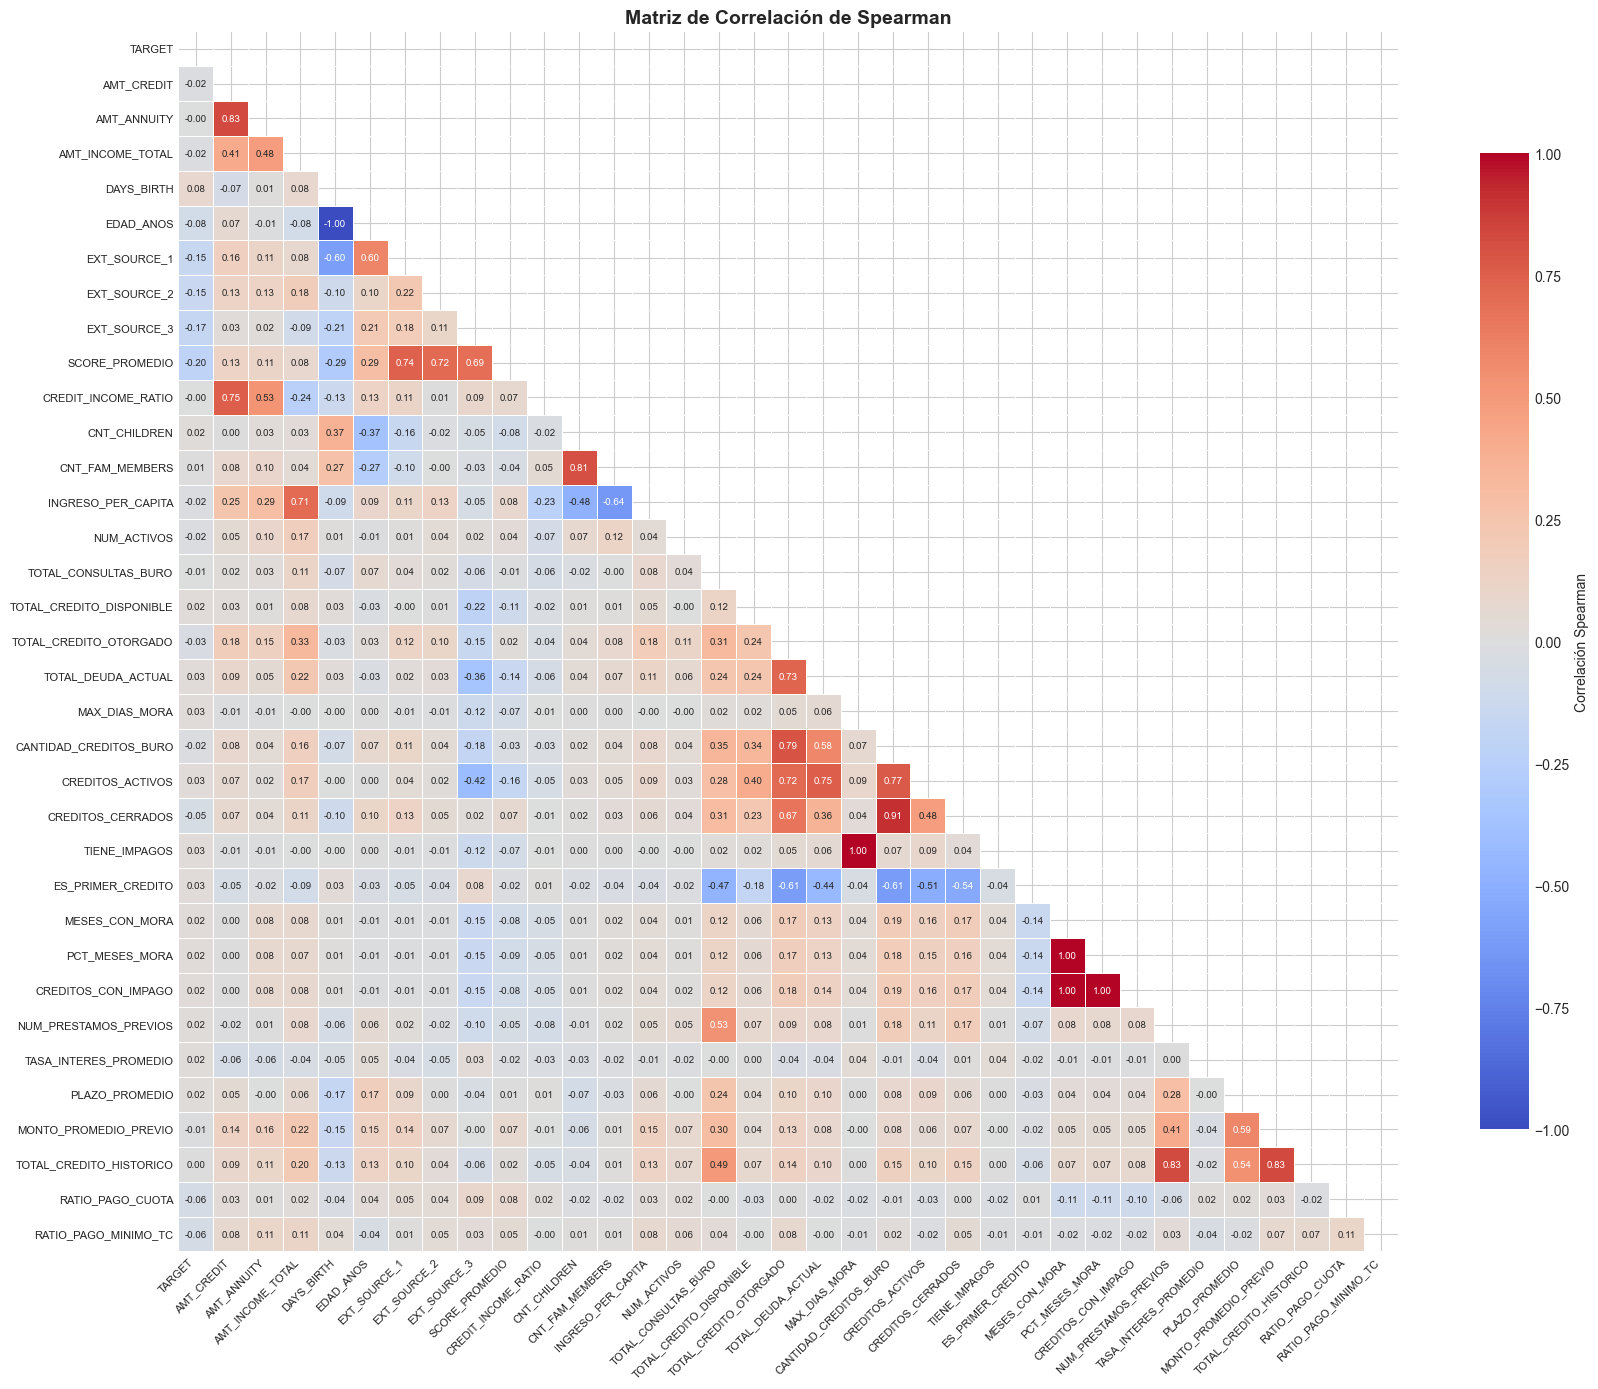

In [ ]:
# ============================================================
# PASO 7: CORRELACIÓN DE SPEARMAN (Para relaciones no lineales)
# ============================================================
# Spearman mide relaciones monotónicas, no solo lineales
# Es más robusta ante outliers y distribuciones no normales

# Calcular correlación de Spearman
spearman_matrix = df_numeric.corr(method='spearman')

print("="*60)
print("CORRELACIÓN DE SPEARMAN")
print("="*60)

if 'TARGET' in df_numeric.columns:
    spearman_target = spearman_matrix['TARGET'].drop('TARGET').sort_values(key=abs, ascending=False)
    
    print("\nComparación Pearson vs Spearman (correlación con TARGET):\n")
    print(f"{'Variable':35s} {'Pearson':>10s} {'Spearman':>10s} {'Diferencia':>12s}")
    print("-" * 70)
    
    for var in spearman_target.index:
        pearson_val = target_corr[var]
        spearman_val = spearman_target[var]
        diff = abs(spearman_val) - abs(pearson_val)
        print(f"{var:35s} {pearson_val:+.4f}    {spearman_val:+.4f}    {diff:+.4f}")

# Visualizar matriz de Spearman
plt.figure(figsize=(18, 14))
mask = np.triu(np.ones_like(spearman_matrix, dtype=bool))

sns.heatmap(
    spearman_matrix,
    mask=mask,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    vmin=-1,
    vmax=1,
    square=True,
    linewidths=0.5,
    cbar_kws={'shrink': 0.8, 'label': 'Correlación Spearman'},
    annot_kws={'size': 7}
)

plt.title('Matriz de Correlación de Spearman', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/correlation_matrix_spearman.png', dpi=150, bbox_inches='tight')
plt.show()


In [23]:
# ============================================================
# PASO 8: ANÁLISIS DE CORRELACIÓN POR GRUPOS DE VARIABLES
# ============================================================
# Agrupamos las variables por categoría para un análisis más detallado

# Definir grupos de variables según su naturaleza
variable_groups = {
    'Financieras': ['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'CREDIT_INCOME_RATIO', 'INGRESO_PER_CAPITA'],
    'Scores_Externos': ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'SCORE_PROMEDIO'],
    'Demográficas': ['DAYS_BIRTH', 'EDAD_ANOS', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'NUM_ACTIVOS'],
    'Historial_Crediticio': ['TOTAL_CONSULTAS_BURO', 'TOTAL_CREDITO_DISPONIBLE', 'TOTAL_CREDITO_OTORGADO', 
                             'TOTAL_DEUDA_ACTUAL', 'CANTIDAD_CREDITOS_BURO', 'CREDITOS_ACTIVOS', 
                             'CREDITOS_CERRADOS', 'TOTAL_CREDITO_HISTORICO'],
    'Comportamiento_Pago': ['MAX_DIAS_MORA', 'TIENE_IMPAGOS', 'MESES_CON_MORA', 'PCT_MESES_MORA', 
                           'CREDITOS_CON_IMPAGO', 'RATIO_PAGO_CUOTA', 'RATIO_PAGO_MINIMO_TC'],
    'Préstamos_Previos': ['NUM_PRESTAMOS_PREVIOS', 'TASA_INTERES_PROMEDIO', 'PLAZO_PROMEDIO', 
                          'MONTO_PROMEDIO_PREVIO', 'ES_PRIMER_CREDITO']
}

print("="*60)
print("CORRELACIÓN CON TARGET POR GRUPO DE VARIABLES")
print("="*60)

for group_name, variables in variable_groups.items():
    # Filtrar variables que existen en el dataset
    existing_vars = [v for v in variables if v in df_numeric.columns and v != 'TARGET']
    
    if existing_vars and 'TARGET' in df_numeric.columns:
        print(f"\n📊 {group_name}:")
        print("-" * 50)
        
        for var in existing_vars:
            corr_val = target_corr.get(var, np.nan)
            if not pd.isna(corr_val):
                bar_len = int(abs(corr_val) * 30)
                bar = '█' * bar_len + '░' * (30 - bar_len)
                sign = '+' if corr_val > 0 else '-'
                print(f"  {var:30s} [{bar}] {sign}{abs(corr_val):.3f}")


CORRELACIÓN CON TARGET POR GRUPO DE VARIABLES

📊 Financieras:
--------------------------------------------------
  AMT_CREDIT                     [░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░] -0.030
  AMT_ANNUITY                    [░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░] -0.013
  AMT_INCOME_TOTAL               [░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░] -0.004
  CREDIT_INCOME_RATIO            [░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░] -0.008
  INGRESO_PER_CAPITA             [░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░] -0.007

📊 Scores_Externos:
--------------------------------------------------
  EXT_SOURCE_1                   [████░░░░░░░░░░░░░░░░░░░░░░░░░░] -0.155
  EXT_SOURCE_2                   [████░░░░░░░░░░░░░░░░░░░░░░░░░░] -0.160
  EXT_SOURCE_3                   [█████░░░░░░░░░░░░░░░░░░░░░░░░░] -0.179
  SCORE_PROMEDIO                 [██████░░░░░░░░░░░░░░░░░░░░░░░░] -0.222

📊 Demográficas:
--------------------------------------------------
  DAYS_BIRTH                     [██░░░░░░░░░░░░░░░░░░░░░░░░░░░░] +0.078
  EDAD_ANOS       

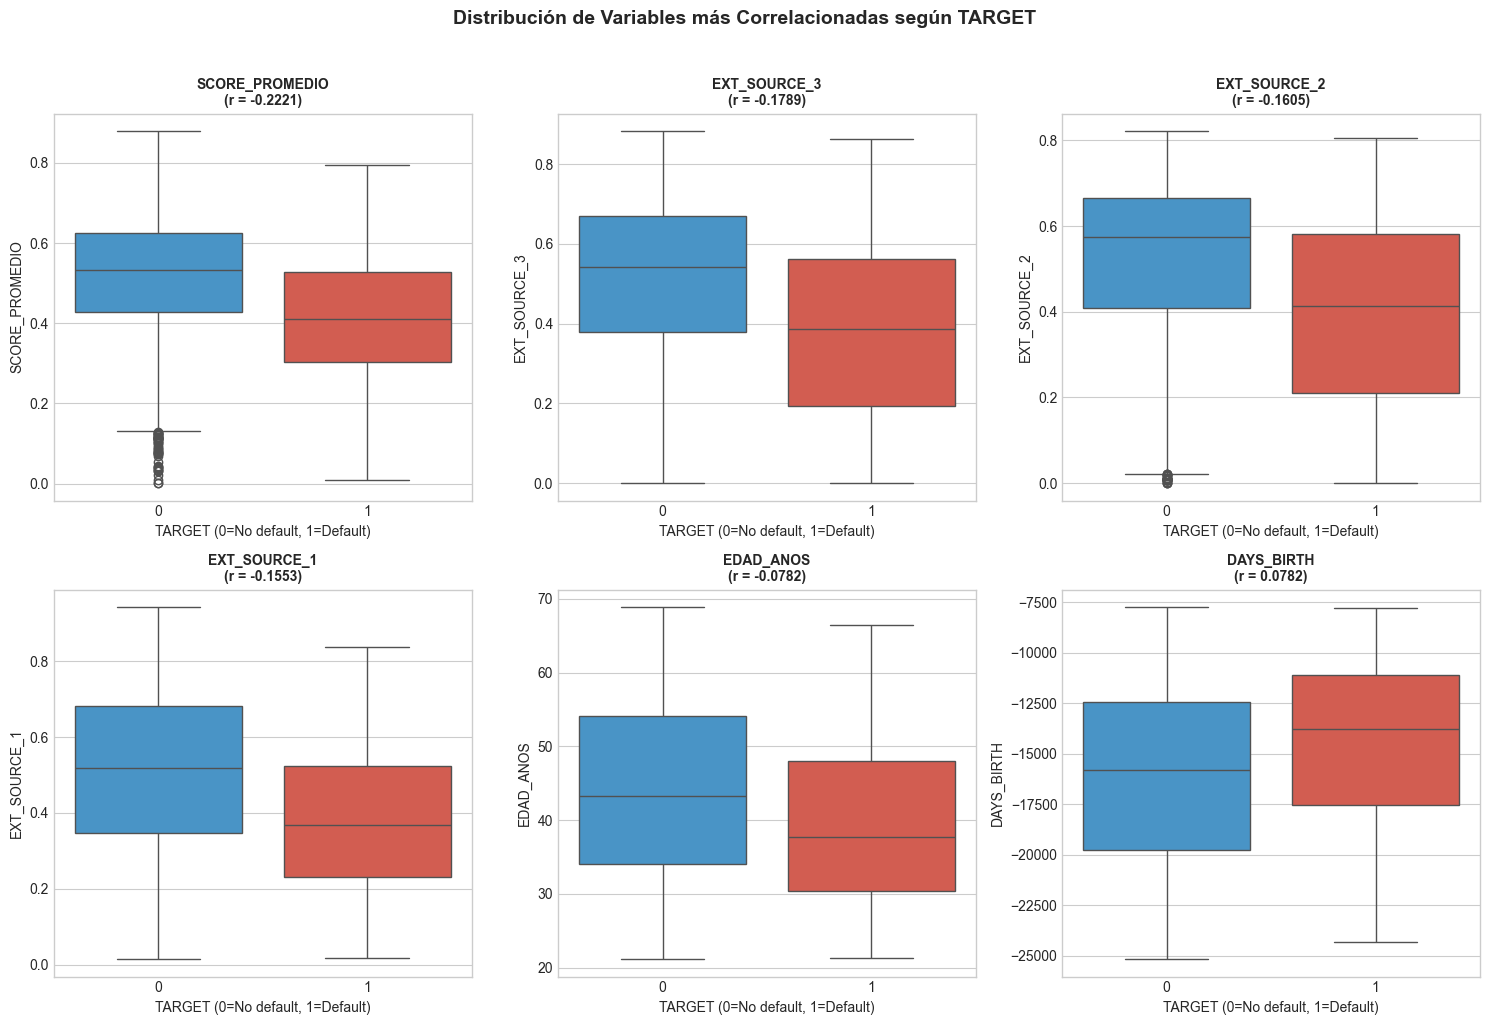

In [ ]:
# ============================================================
# PASO 9: SCATTER PLOTS DE VARIABLES MÁS CORRELACIONADAS CON TARGET
# ============================================================
# Visualización de las relaciones más importantes

if 'TARGET' in df_numeric.columns:
    # Top 6 variables más correlacionadas con TARGET (por valor absoluto)
    top_vars = target_corr.head(6).index.tolist()
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    
    for idx, var in enumerate(top_vars):
        ax = axes[idx]
        
        # Crear scatter con jitter para TARGET binaria
        df_sample = df_numeric[[var, 'TARGET']].dropna().sample(min(5000, len(df_numeric)), random_state=42)
        
        # Boxplot por grupo de TARGET
        sns.boxplot(data=df_sample, x='TARGET', y=var, ax=ax, palette=['#3498db', '#e74c3c'])
        
        corr_val = target_corr[var]
        ax.set_title(f'{var}\n(r = {corr_val:.4f})', fontsize=10, fontweight='bold')
        ax.set_xlabel('TARGET (0=No default, 1=Default)')
        ax.set_ylabel(var)
    
    plt.suptitle('Distribución de Variables más Correlacionadas según TARGET', fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.savefig(f'{OUTPUT_DIR}/top_correlations_boxplot.png', dpi=150, bbox_inches='tight')
    plt.show()


In [25]:
# ============================================================
# PASO 10: PRUEBAS DE SIGNIFICANCIA ESTADÍSTICA
# ============================================================
# Verificamos si las correlaciones son estadísticamente significativas

print("="*60)
print("PRUEBAS DE SIGNIFICANCIA ESTADÍSTICA (p-valores)")
print("="*60)
print("\nHipótesis nula (H0): No existe correlación (r = 0)")
print("Nivel de significancia: α = 0.05\n")

if 'TARGET' in df_numeric.columns:
    significance_results = []
    
    for var in target_corr.index:
        # Obtener datos sin valores nulos
        valid_data = df_numeric[[var, 'TARGET']].dropna()
        
        if len(valid_data) > 2:
            # Calcular correlación con p-valor
            corr, p_value = stats.pearsonr(valid_data[var], valid_data['TARGET'])
            
            significance_results.append({
                'Variable': var,
                'Correlación': corr,
                'p-valor': p_value,
                'Significativo': '✓ Sí' if p_value < 0.05 else '✗ No',
                'n': len(valid_data)
            })
    
    sig_df = pd.DataFrame(significance_results)
    sig_df = sig_df.sort_values('Correlación', key=abs, ascending=False)
    
    print(f"{'Variable':35s} {'r':>10s} {'p-valor':>12s} {'Signif.':>10s} {'n':>10s}")
    print("-" * 80)
    
    for _, row in sig_df.iterrows():
        p_str = f"{row['p-valor']:.2e}" if row['p-valor'] < 0.001 else f"{row['p-valor']:.4f}"
        print(f"{row['Variable']:35s} {row['Correlación']:+.4f}    {p_str:>12s} {row['Significativo']:>10s} {row['n']:>10,d}")
    
    # Resumen
    sig_count = sum(1 for r in significance_results if r['p-valor'] < 0.05)
    print(f"\n📌 RESUMEN: {sig_count} de {len(significance_results)} variables tienen correlación significativa con TARGET (p < 0.05)")


PRUEBAS DE SIGNIFICANCIA ESTADÍSTICA (p-valores)

Hipótesis nula (H0): No existe correlación (r = 0)
Nivel de significancia: α = 0.05

Variable                                     r      p-valor    Signif.          n
--------------------------------------------------------------------------------
SCORE_PROMEDIO                      -0.2221        0.00e+00       ✓ Sí    307,339
EXT_SOURCE_3                        -0.1789        0.00e+00       ✓ Sí    246,546
EXT_SOURCE_2                        -0.1605        0.00e+00       ✓ Sí    306,851
EXT_SOURCE_1                        -0.1553        0.00e+00       ✓ Sí    134,133
DAYS_BIRTH                          +0.0782        0.00e+00       ✓ Sí    307,511
EDAD_ANOS                           -0.0782        0.00e+00       ✓ Sí    307,511
CREDITOS_ACTIVOS                    +0.0436       4.40e-129       ✓ Sí    307,511
CREDITOS_CERRADOS                   -0.0372        8.99e-95       ✓ Sí    307,511
PCT_MESES_MORA                      +0.0317   

In [26]:
# ============================================================
# PASO 11: FACTOR DE INFLACIÓN DE VARIANZA (VIF)
# ============================================================
# El VIF mide cuánto aumenta la varianza de un coeficiente de regresión
# debido a la multicolinealidad. VIF > 10 indica multicolinealidad severa

from statsmodels.stats.outliers_influence import variance_inflation_factor

print("="*60)
print("FACTOR DE INFLACIÓN DE VARIANZA (VIF)")
print("="*60)
print("\nInterpretación:")
print("  • VIF = 1: Sin correlación con otras variables")
print("  • VIF 1-5: Correlación moderada (aceptable)")
print("  • VIF 5-10: Alta correlación (considerar eliminar)")
print("  • VIF > 10: Multicolinealidad severa (eliminar)\n")

# Preparar datos para VIF (sin TARGET, sin valores nulos)
X_vif = df_numeric.drop(columns=['TARGET'], errors='ignore').dropna()

# Calcular VIF para cada variable (puede tomar tiempo con muchas variables)
vif_data = []
for i, col in enumerate(X_vif.columns):
    try:
        vif = variance_inflation_factor(X_vif.values, i)
        vif_data.append({'Variable': col, 'VIF': vif})
    except:
        vif_data.append({'Variable': col, 'VIF': np.nan})

vif_df = pd.DataFrame(vif_data).sort_values('VIF', ascending=False)
vif_df = vif_df[~vif_df['VIF'].isna()]

print(f"{'Variable':35s} {'VIF':>12s} {'Diagnóstico':>20s}")
print("-" * 70)

for _, row in vif_df.iterrows():
    if row['VIF'] > 10:
        diag = "⚠️  SEVERA"
    elif row['VIF'] > 5:
        diag = "⚡ Alta"
    elif row['VIF'] > 1:
        diag = "✓ Aceptable"
    else:
        diag = "✓ Sin correlación"
    
    print(f"{row['Variable']:35s} {row['VIF']:12.2f} {diag:>20s}")

# Variables problemáticas
high_vif = vif_df[vif_df['VIF'] > 5]
if len(high_vif) > 0:
    print(f"\n⚠️  ALERTA: {len(high_vif)} variables con VIF > 5")
    print("   Considere eliminar o combinar estas variables para reducir multicolinealidad")


FACTOR DE INFLACIÓN DE VARIANZA (VIF)

Interpretación:
  • VIF = 1: Sin correlación con otras variables
  • VIF 1-5: Correlación moderada (aceptable)
  • VIF 5-10: Alta correlación (considerar eliminar)
  • VIF > 10: Multicolinealidad severa (eliminar)

Variable                                     VIF          Diagnóstico
----------------------------------------------------------------------
DAYS_BIRTH                                   inf           ⚠️  SEVERA
EDAD_ANOS                                    inf           ⚠️  SEVERA
EXT_SOURCE_1                                 inf           ⚠️  SEVERA
EXT_SOURCE_2                                 inf           ⚠️  SEVERA
EXT_SOURCE_3                                 inf           ⚠️  SEVERA
SCORE_PROMEDIO                               inf           ⚠️  SEVERA
CANTIDAD_CREDITOS_BURO                   3252.91           ⚠️  SEVERA
CREDITOS_CERRADOS                        1558.06           ⚠️  SEVERA
CREDITOS_ACTIVOS                          431

<Figure size 1600x1400 with 0 Axes>

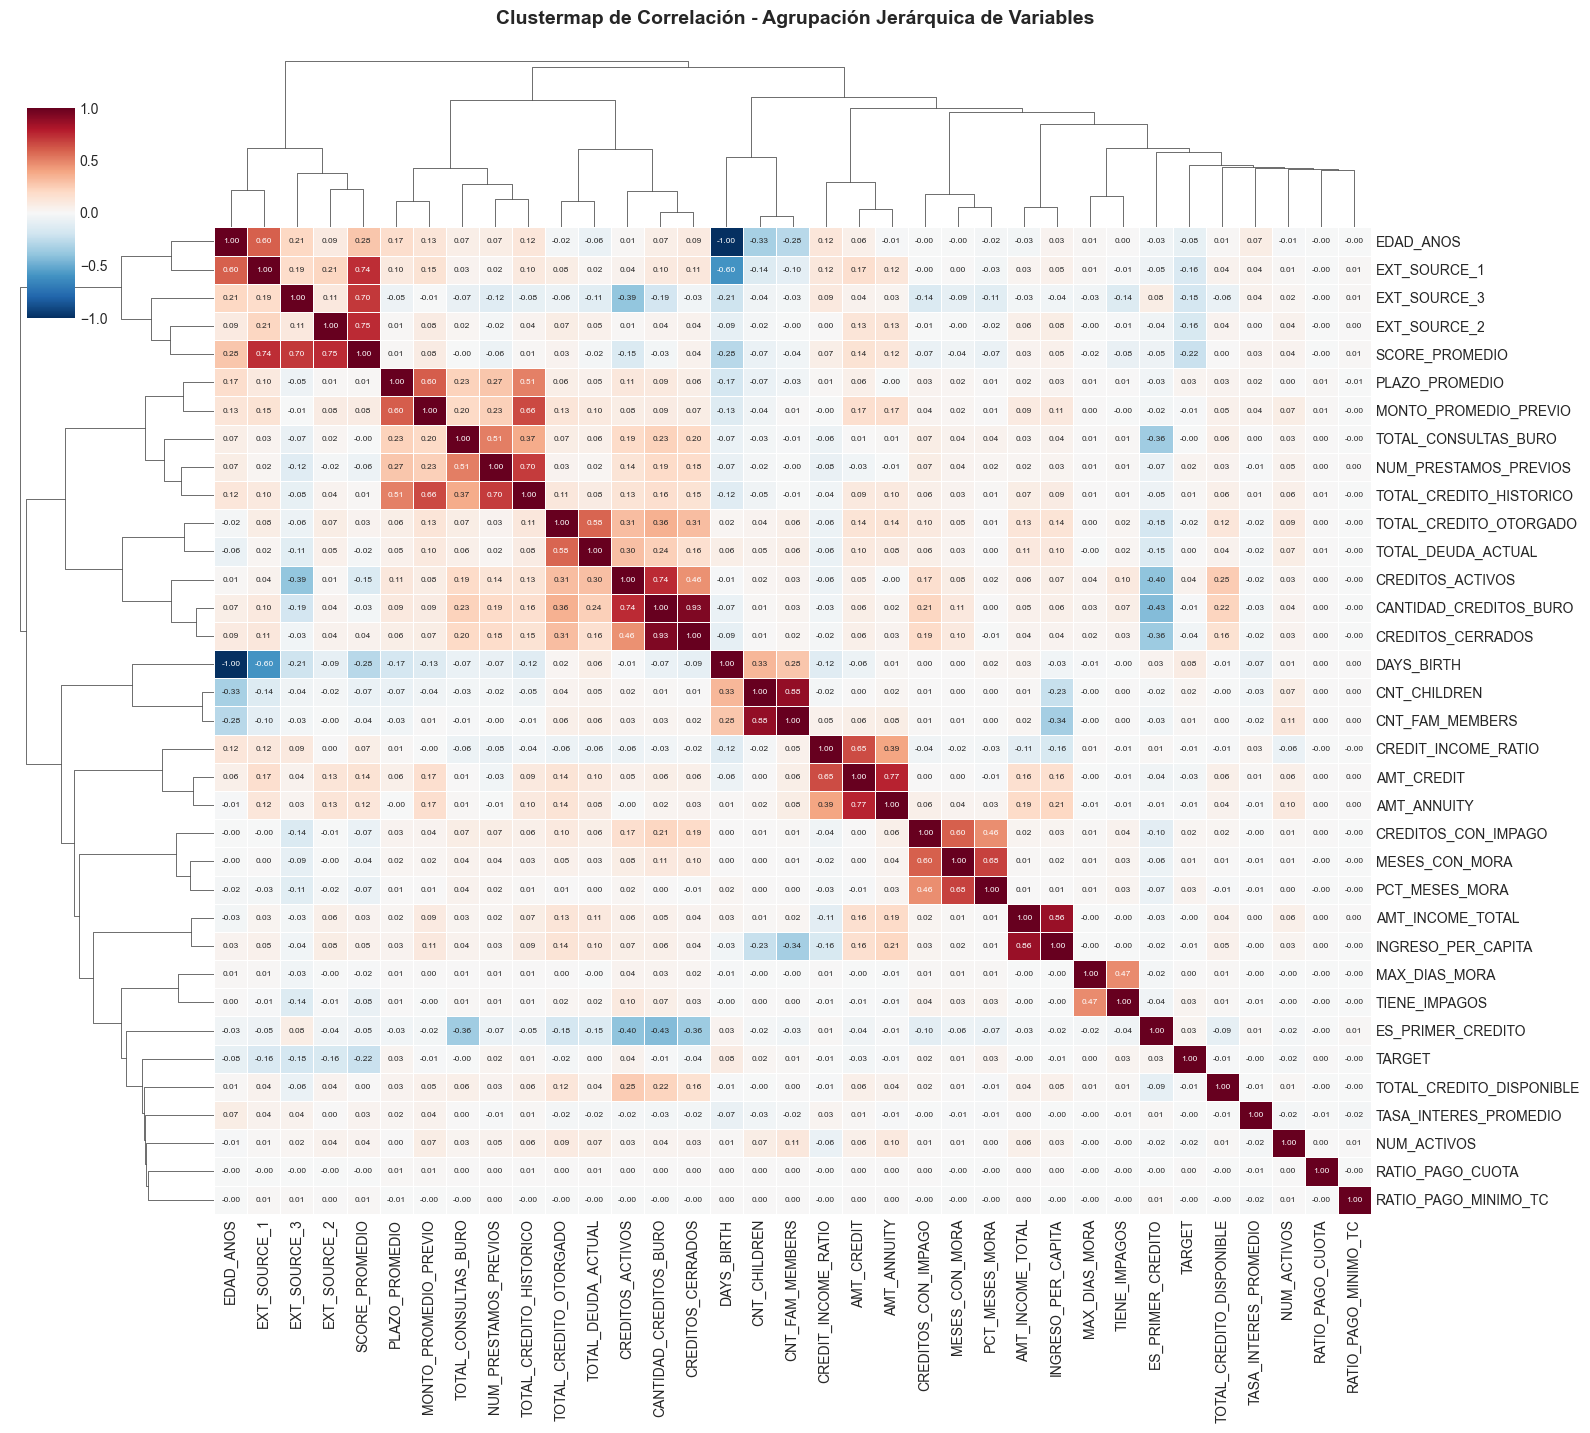


📊 Orden de variables según agrupación jerárquica:
   (Variables cercanas tienden a estar más correlacionadas)
    1. EDAD_ANOS
    2. EXT_SOURCE_1
    3. EXT_SOURCE_3
    4. EXT_SOURCE_2
    5. SCORE_PROMEDIO
    6. PLAZO_PROMEDIO
    7. MONTO_PROMEDIO_PREVIO
    8. TOTAL_CONSULTAS_BURO
    9. NUM_PRESTAMOS_PREVIOS
   10. TOTAL_CREDITO_HISTORICO
   11. TOTAL_CREDITO_OTORGADO
   12. TOTAL_DEUDA_ACTUAL
   13. CREDITOS_ACTIVOS
   14. CANTIDAD_CREDITOS_BURO
   15. CREDITOS_CERRADOS
   16. DAYS_BIRTH
   17. CNT_CHILDREN
   18. CNT_FAM_MEMBERS
   19. CREDIT_INCOME_RATIO
   20. AMT_CREDIT
   21. AMT_ANNUITY
   22. CREDITOS_CON_IMPAGO
   23. MESES_CON_MORA
   24. PCT_MESES_MORA
   25. AMT_INCOME_TOTAL
   26. INGRESO_PER_CAPITA
   27. MAX_DIAS_MORA
   28. TIENE_IMPAGOS
   29. ES_PRIMER_CREDITO
   30. TARGET
   31. TOTAL_CREDITO_DISPONIBLE
   32. TASA_INTERES_PROMEDIO
   33. NUM_ACTIVOS
   34. RATIO_PAGO_CUOTA
   35. RATIO_PAGO_MINIMO_TC


In [ ]:
# ============================================================
# PASO 12: CLUSTERMAP - AGRUPACIÓN JERÁRQUICA DE VARIABLES
# ============================================================
# El clustermap agrupa variables similares, facilitando identificar
# clusters de variables correlacionadas

plt.figure(figsize=(16, 14))

# Crear clustermap con agrupación jerárquica
cluster_map = sns.clustermap(
    correlation_matrix,
    method='ward',
    cmap='RdBu_r',
    center=0,
    vmin=-1,
    vmax=1,
    annot=True,
    fmt='.2f',
    annot_kws={'size': 6},
    linewidths=0.5,
    figsize=(16, 14),
    dendrogram_ratio=(0.15, 0.15),
    cbar_pos=(0.02, 0.8, 0.03, 0.15)
)

cluster_map.fig.suptitle('Clustermap de Correlación - Agrupación Jerárquica de Variables', 
                          fontsize=14, fontweight='bold', y=1.02)

plt.savefig(f'{OUTPUT_DIR}/correlation_clustermap.png', dpi=150, bbox_inches='tight')
plt.show()

# Mostrar el orden de agrupación
print("\n📊 Orden de variables según agrupación jerárquica:")
print("   (Variables cercanas tienden a estar más correlacionadas)")
reordered_vars = [correlation_matrix.columns[i] for i in cluster_map.dendrogram_row.reordered_ind]
for i, var in enumerate(reordered_vars, 1):
    print(f"   {i:2d}. {var}")


In [ ]:
# ============================================================
# PASO 13: EXPORTAR RESULTADOS
# ============================================================
# Guardar las matrices de correlación y los análisis para uso posterior

print("="*60)
print("EXPORTANDO RESULTADOS")
print("="*60)
print(f"📁 Directorio de salida: {OUTPUT_DIR}\n")

# 1. Matriz de correlación de Pearson
correlation_matrix.to_csv(f'{OUTPUT_DIR}/correlation_matrix_pearson.csv')
print(f"✓ Matriz de correlación Pearson guardada: {OUTPUT_DIR}/correlation_matrix_pearson.csv")

# 2. Matriz de correlación de Spearman
spearman_matrix.to_csv(f'{OUTPUT_DIR}/correlation_matrix_spearman.csv')
print(f"✓ Matriz de correlación Spearman guardada: {OUTPUT_DIR}/correlation_matrix_spearman.csv")

# 3. Correlaciones con TARGET
if 'TARGET' in df_numeric.columns:
    target_corr_df = pd.DataFrame({
        'Variable': target_corr.index,
        'Pearson': target_corr.values,
        'Spearman': [spearman_target[v] for v in target_corr.index]
    })
    target_corr_df.to_csv(f'{OUTPUT_DIR}/correlations_with_target.csv', index=False)
    print(f"✓ Correlaciones con TARGET guardadas: {OUTPUT_DIR}/correlations_with_target.csv")

# 4. VIF
vif_df.to_csv(f'{OUTPUT_DIR}/vif_analysis.csv', index=False)
print(f"✓ Análisis VIF guardado: {OUTPUT_DIR}/vif_analysis.csv")

# 5. Pares de alta correlación
if high_corr_pairs:
    high_corr_df.to_csv(f'{OUTPUT_DIR}/high_correlation_pairs.csv', index=False)
    print(f"✓ Pares de alta correlación guardados: {OUTPUT_DIR}/high_correlation_pairs.csv")

print("\n" + "="*60)
print("ANÁLISIS DE CORRELACIÓN COMPLETADO")
print("="*60)


EXPORTANDO RESULTADOS
✓ Matriz de correlación Pearson guardada: correlation_matrix_pearson.csv
✓ Matriz de correlación Spearman guardada: correlation_matrix_spearman.csv
✓ Correlaciones con TARGET guardadas: correlations_with_target.csv
✓ Análisis VIF guardado: vif_analysis.csv
✓ Pares de alta correlación guardados: high_correlation_pairs.csv

ANÁLISIS DE CORRELACIÓN COMPLETADO


In [29]:
# ============================================================
# PASO 14: RESUMEN EJECUTIVO Y CONCLUSIONES
# ============================================================

print("="*70)
print("                    RESUMEN EJECUTIVO")
print("="*70)

if 'TARGET' in df_numeric.columns:
    print("\n📊 HALLAZGOS PRINCIPALES:")
    print("-" * 70)
    
    # Top 5 variables positivamente correlacionadas
    top_positive = target_corr[target_corr > 0].head(5)
    print("\n🔺 Top 5 variables POSITIVAMENTE correlacionadas con incumplimiento:")
    for var, corr in top_positive.items():
        print(f"   • {var}: r = {corr:+.4f}")
    
    # Top 5 variables negativamente correlacionadas
    top_negative = target_corr[target_corr < 0].sort_values().head(5)
    print("\n🔻 Top 5 variables NEGATIVAMENTE correlacionadas con incumplimiento:")
    for var, corr in top_negative.items():
        print(f"   • {var}: r = {corr:+.4f}")
    
    print("\n\n📋 INTERPRETACIÓN:")
    print("-" * 70)
    print("""
    • Variables con correlación POSITIVA: A mayor valor, mayor probabilidad de incumplimiento
    • Variables con correlación NEGATIVA: A mayor valor, menor probabilidad de incumplimiento
    
    ⚠️  NOTA: Correlación NO implica causalidad. Estos resultados sugieren asociaciones
    que deben ser validadas con análisis adicionales y conocimiento del dominio.
    """)
    
    print("\n📌 RECOMENDACIONES PARA MODELADO:")
    print("-" * 70)
    print("""
    1. Considerar las variables con |r| > 0.1 como candidatas principales
    2. Evaluar la eliminación de variables con VIF > 10 por multicolinealidad
    3. Variables con alta correlación entre sí pueden causar inestabilidad en 
       modelos de regresión - considerar eliminar una de cada par
    4. Para Random Forest/XGBoost, la multicolinealidad no es tan problemática
       pero puede afectar la interpretabilidad de feature importance
    """)

print("\n" + "="*70)
print("                    FIN DEL ANÁLISIS")
print("="*70)


                    RESUMEN EJECUTIVO

📊 HALLAZGOS PRINCIPALES:
----------------------------------------------------------------------

🔺 Top 5 variables POSITIVAMENTE correlacionadas con incumplimiento:
   • DAYS_BIRTH: r = +0.0782
   • CREDITOS_ACTIVOS: r = +0.0436
   • PCT_MESES_MORA: r = +0.0317
   • ES_PRIMER_CREDITO: r = +0.0308
   • TIENE_IMPAGOS: r = +0.0304

🔻 Top 5 variables NEGATIVAMENTE correlacionadas con incumplimiento:
   • SCORE_PROMEDIO: r = -0.2221
   • EXT_SOURCE_3: r = -0.1789
   • EXT_SOURCE_2: r = -0.1605
   • EXT_SOURCE_1: r = -0.1553
   • EDAD_ANOS: r = -0.0782


📋 INTERPRETACIÓN:
----------------------------------------------------------------------

    • Variables con correlación POSITIVA: A mayor valor, mayor probabilidad de incumplimiento
    • Variables con correlación NEGATIVA: A mayor valor, menor probabilidad de incumplimiento
    
    ⚠️  NOTA: Correlación NO implica causalidad. Estos resultados sugieren asociaciones
    que deben ser validadas con aná